In [1]:
import pandas as pd 
import numpy as np
import pickle 

In [2]:
df=pd.read_csv("Ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
column_remove=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=column_remove,axis=1,inplace=True)

In [5]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
consistent_team=['kolkata knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore',
                 'Delhi Daredevils','Sunrisers Hyderabad']

In [8]:
consistent_team

['kolkata knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Sunrisers Hyderabad']

In [9]:
# filtering the team 
df= df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [10]:
# Removing the first 5 overs data in every team 
df=df[df['overs']>5.0]

In [11]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
156,2008-04-19,Chennai Super Kings,Kings XI Punjab,46,1,5.1,45,1,240
157,2008-04-19,Chennai Super Kings,Kings XI Punjab,52,1,5.2,51,1,240
158,2008-04-19,Chennai Super Kings,Kings XI Punjab,52,1,5.3,47,1,240
159,2008-04-19,Chennai Super Kings,Kings XI Punjab,53,1,5.4,48,1,240
160,2008-04-19,Chennai Super Kings,Kings XI Punjab,53,1,5.5,44,1,240


In [12]:
#converitng the columns 'date' from string into datetime object
from datetime import datetime
df['date']=df['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [13]:
#Data preprocessing
#converting categorical features into onehot encoding
encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [14]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
156,2008-04-19,46,1,5.1,45,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
157,2008-04-19,52,1,5.2,51,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
158,2008-04-19,52,1,5.3,47,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
159,2008-04-19,53,1,5.4,48,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
160,2008-04-19,53,1,5.5,44,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
#Rearranging the columns
encoded_df=encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [17]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
156,2008-04-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,46,1,5.1,45,1,240
157,2008-04-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,52,1,5.2,51,1,240
158,2008-04-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,52,1,5.3,47,1,240
159,2008-04-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,53,1,5.4,48,1,240
160,2008-04-19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,53,1,5.5,44,1,240


In [18]:
#splitting the data into train and test set
X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [19]:
y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

In [20]:
#removing the date columns
X_train.drop(labels='date', axis=True,inplace=True)
X_test.drop(labels='date', axis=True,inplace=True)

In [21]:
# Model  Building
#linear Regression model 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
#creating a pickle file for the classifier
filename='first-innings-score-lr-model.pkl'
pickle.dump(regressor,open(filename,'wb'))

# Ridge Regression

In [23]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [24]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

c:\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95687e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98141e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94112e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96438e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04922e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-346.7595350510962


In [26]:
prediction=ridge_regressor.predict(X_test)

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

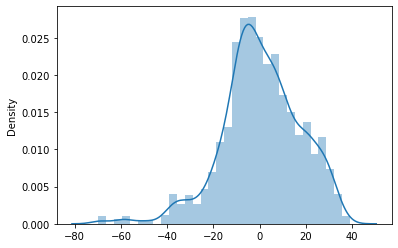

In [27]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [28]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE: 13.134565552060357
MSE: 289.87132276056604
RMSE: 17.02560785289518


# Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,5,30,40,50,60]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2994301.873399249, tolerance: 2097.6691339833483
  model = cd_fast.enet_coordinate_descent(
c:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3424346.9251311645, tolerance: 2022.094631531083
  model = cd_fast.enet_coordinate_descent(
c:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3479291.4327557874, tolerance: 2105.362259361144
  model = cd_fast.enet_coordinate_descent(
c:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to 

{'alpha': 5}
-344.01101423874377


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

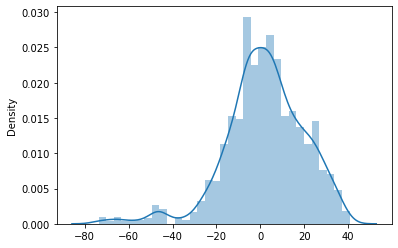

In [34]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [35]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 13.752072754894753
MSE: 330.74815724870894
RMSE: 18.18648281688103
